# Clustering Examples

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
print("Reference: Dorin Comaniciu and Peter Meer, 'Mean Shift: A robust approach toward feature space analysis")
print('IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.')

## Example 1: Clustering with Mean Shift

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [ ]:
print(X)

In [ ]:
# Train the model and determine the number of clusters
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

In [ ]:
# Plot result
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
  my_members = labels == k
  cluster_center = cluster_centers[k]
  plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
  plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
           markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Example 2: Clustering with K-Means

In [ ]:
## Train and evaluate the model
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

In [ ]:
np.random.seed(5)

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define different K-Means clustering models
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

# Train the different models and plot the results
fignum = 1
for name, est in estimators.items():
  fig = plt.figure(fignum, figsize=(4, 3))
  plt.clf()
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  plt.cla()
  est.fit(X)
  labels = est.labels_
  ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
  ax.w_xaxis.set_ticklabels([])
  ax.w_yaxis.set_ticklabels([])
  ax.w_zaxis.set_ticklabels([])
  ax.set_xlabel('Petal width')
  ax.set_ylabel('Sepal length')
  ax.set_zlabel('Petal length')
  plt.title(name)
  fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
plt.title('Ground truth classes')
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
  ax.text3D(X[y == label, 3].mean(),
  X[y == label, 0].mean() + 1.5,
  X[y == label, 2].mean(), name,
  horizontalalignment='center',
  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

# Report

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

#### Load Data

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_data = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 42)
#shuffle ensures that data will be shuffled before splitting into training/testing
#random_state is the seed for shuffling data, this should stay the same across runs

print("Number of documents:", len(newsgroups_data.data))
print("Number of categories:", len(newsgroups_data.target_names))
print("Categories:")
for category in newsgroups_data.target_names:
    print("-", category)
    
# Print the first few documents
print("\nFirst few documents:")
for i in range(5):  # Print the first 5 documents
    print(f"\nDocument {i + 1}:")
    print(newsgroups_data.data[i])  # Print the content of each document

Number of documents: 18846
Number of categories: 20
Categories:
- alt.atheism
- comp.graphics
- comp.os.ms-windows.misc
- comp.sys.ibm.pc.hardware
- comp.sys.mac.hardware
- comp.windows.x
- misc.forsale
- rec.autos
- rec.motorcycles
- rec.sport.baseball
- rec.sport.hockey
- sci.crypt
- sci.electronics
- sci.med
- sci.space
- soc.religion.christian
- talk.politics.guns
- talk.politics.mideast
- talk.politics.misc
- talk.religion.misc

First few documents:

Document 1:
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I 

C:\Users\Drew\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


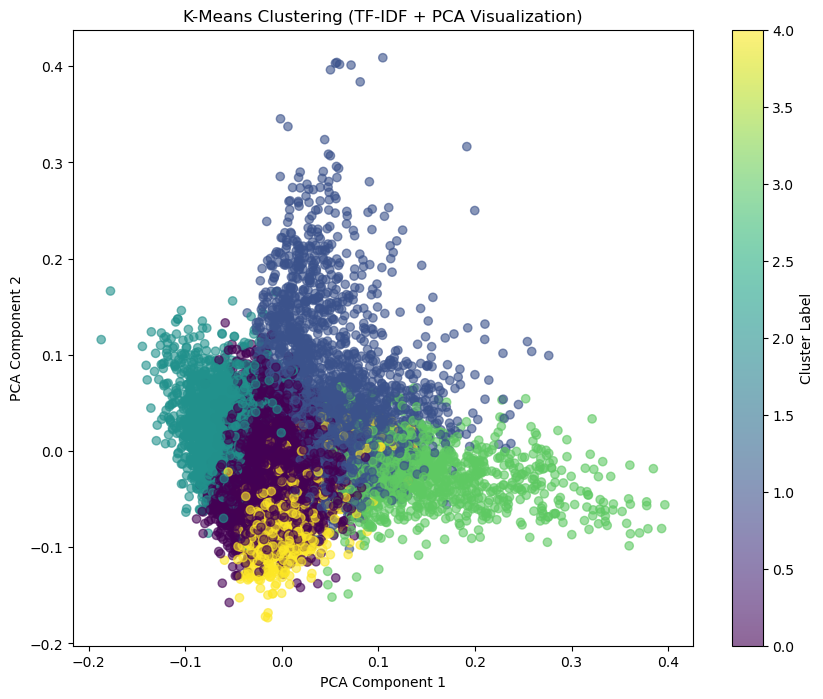

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocessing - TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(newsgroups_data.data)

# Clustering - K-means
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_tfidf)

# Dimensionality Reduction - PCA
pca = PCA(n_components=2)
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=cluster_labels_kmeans, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering (TF-IDF + PCA Visualization)')
plt.colorbar(scatter, label='Cluster Label')

# Show plot
plt.show()


C:\Users\Drew\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Hierarchical Clustering:
Cluster Labels:
 [2 0 0 ... 1 1 0]
Silhouette Score: -0.035577021357558074
Adjusted Rand Index (ARI): 0.0016327972311052964


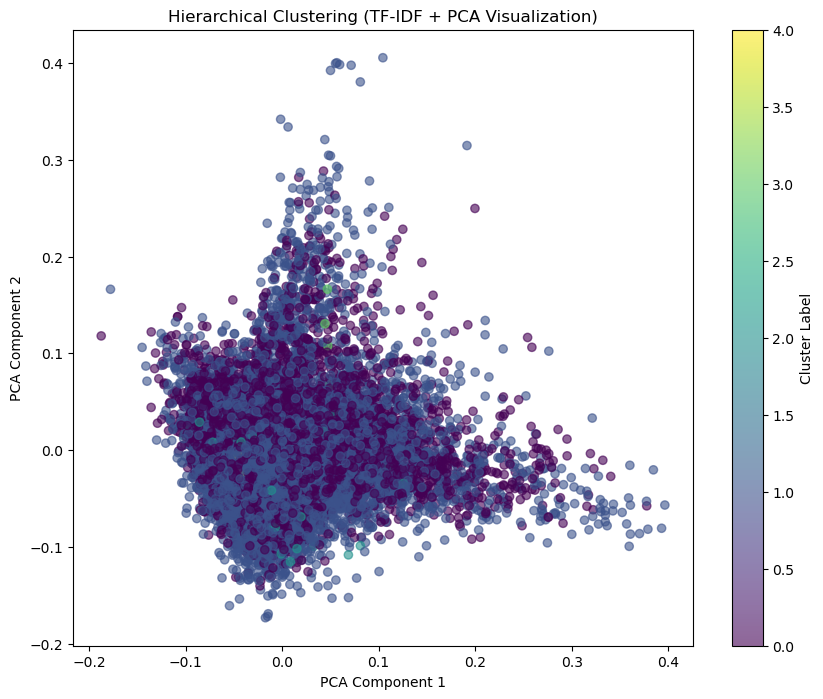

In [3]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Load data
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = newsgroups_data.data

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Calculate pairwise distances using cosine similarity
distance_matrix = pairwise_distances(X_tfidf, metric='cosine')

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
cluster_labels_hierarchical = hierarchical.fit_predict(distance_matrix)

# Calculate silhouette score
silhouette = silhouette_score(distance_matrix, cluster_labels_hierarchical)

# Calculate Adjusted Rand Index (ARI)
true_labels = newsgroups_data.target
ari_score = adjusted_rand_score(true_labels, cluster_labels_hierarchical)

# Output information
print("\nHierarchical Clustering:")
print("Cluster Labels:\n", cluster_labels_hierarchical)
print("Silhouette Score:", silhouette)
print("Adjusted Rand Index (ARI):", ari_score)

# Plotting the clusters using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=cluster_labels_hierarchical, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering (TF-IDF + PCA Visualization)')
plt.colorbar(scatter, label='Cluster Label')

# Show plot
plt.show()


C:\Users\Drew\AppData\Local\Temp\ipykernel_592\3410915383.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='complete')


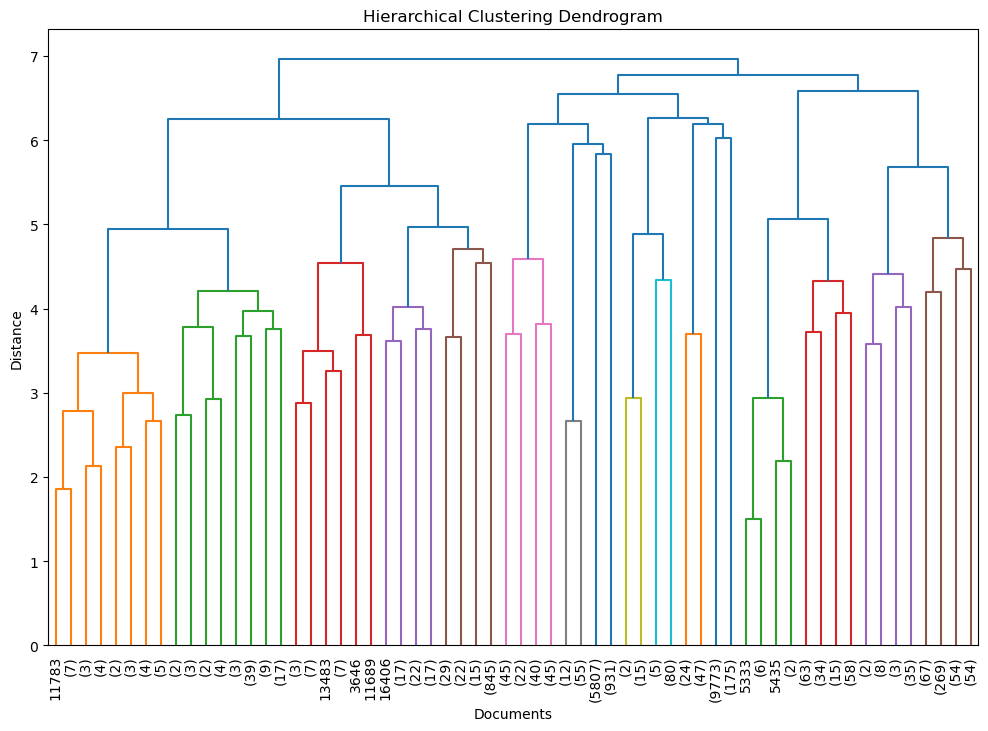

In [5]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = newsgroups_data.data

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Calculate pairwise distances using cosine similarity
distance_matrix = pairwise_distances(X_tfidf, metric='cosine')

# Compute linkage matrix
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### Feature Engineering for Preprocessing

#### 1) Vectorization - Bag of Words (BoW)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

#1) tokenize
#2) create a vocabulary
#3) vectorize
#CountVetorizer handles a lot of this, psuedocode and explanation will be in report

count_vectorizer = CountVectorizer()

X_BoW = count_vectorizer.fit_transform(newsgroups_data.data)

print("Shape of the BoW matrix:", X_BoW.shape)
#each row is a documnet and each column is a word in the vocabulary

Shape of the BoW matrix: (18846, 173762)


#### 2) Normalization - (something idk yet)

In [ ]:
#MaxAbs scaling
from sklearn.preprocessing import MaxAbsScaler

# Assuming X is your numerical data
scaler_maxabs = MaxAbsScaler()
X_normalized_maxabs = scaler_maxabs.fit_transform(X_BoW)
print("\nShape of normalized matrix (MaxAbsScaler):", X_normalized_maxabs.shape)
print("Sample normalized data (MaxAbsScaler):\n", X_normalized_maxabs[0])  # Print a sample row of normalized data

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler

# Assuming X is your numerical data
scaler_standard = StandardScaler(with_mean=False)
X_standardized = scaler_standard.fit_transform(X_BoW)

print("\nShape of standardized matrix (StandardScaler):", X_standardized.shape)
print("Sample standardized data (StandardScaler):\n", X_standardized[0])  # Print a sample row of standardized data

### Similarity Metrics

#### 1) Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming X is your data matrix where each row represents a sample/document
# and each column represents a feature/word
# For text data, X could be the TF-IDF matrix or Bag of Words matrix

# Calculate cosine similarity between all pairs of samples in X
similarity_matrix_cosine = cosine_similarity(X_BoW)
print("\nShape of Cosine Similarity Matrix:", similarity_matrix_cosine.shape)
print("Sample Cosine Similarity Value:\n", similarity_matrix_cosine[0])  # Print a sample cosine similarity value

#### 2) Euclidean Distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming X is your data matrix where each row represents a sample/point
# and each column represents a feature/dimension

# Calculate Euclidean distances between all pairs of samples in X
distance_matrix_euclidean = euclidean_distances(X_BoW)
print("\nShape of Euclidean Distance Matrix:", distance_matrix_euclidean.shape)
print("Sample Euclidean Distance Value:\n", distance_matrix_euclidean[0])  # Print a sample Euclidean distance value

### Clustering Algorithm

#### 1)

In [ ]:
# K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Assuming X_BoW is your Bag of Words (BoW) matrix
kmeans = KMeans(n_clusters=5, random_state=0)  # Specify the number of clusters (e.g., 5)
kmeans.fit(X_BoW)  # Fit K-Means to your data
cluster_centers = kmeans.cluster_centers_  # Get the cluster centers
inertia = kmeans.inertia_  # Get the inertia value
cluster_labels_kmeans = kmeans.labels_  # Get the cluster labels

# Output information
print("\nK-Means Clustering:")
print("Cluster Centers:\n", cluster_centers)
print("Inertia (Sum of Squared Distances to Closest Cluster Center):", inertia)
print("Cluster Labels:\n", cluster_labels_kmeans)
print("Silhouette Score:", silhouette_score(X_BoW, cluster_labels_kmeans))  # internal validation

true_labels = newsgroups_data.target  # Assuming the target labels in the dataset represent the ground truth

# Calculate Adjusted Rand Index (ARI) - extrernal validation
ari_score = adjusted_rand_score(true_labels, cluster_labels_kmeans)
print("Adjusted Rand Index (ARI):", ari_score)

In [ ]:
from sklearn.decomposition import PCA
#no idea whats going on here fr
# Apply PCA for dimensionality reduction (to 2D for visualization)
pca = PCA(n_components=2)
X_BoW_pca = pca.fit_transform(X_BoW.toarray())

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_BoW_pca[:, 0], X_BoW_pca[:, 1], c=cluster_labels_kmeans, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering (PCA Visualization)')
plt.colorbar(label='Cluster Label')
plt.show()

#### 2)

In [8]:
from scipy.spatial.distance import pdist
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score


# Calculate pairwise distances between samples using cosine similarity
distance_matrix = pairwise_distances(X_BoW, metric='cosine')

# Assuming distance_matrix is the pairwise distance matrix
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
cluster_labels_hierarchical = hierarchical.fit_predict(distance_matrix)

# Calculate silhouette score
silhouette = silhouette_score(distance_matrix, cluster_labels_hierarchical)

# Assuming true_labels are the ground truth labels for the samples
true_labels = newsgroups_data.target  # Assuming the target labels in the dataset represent the ground truth

# Calculate Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, cluster_labels_hierarchical)

# Output information
print("\nHierarchical Clustering:")
print("Cluster Labels:\n", cluster_labels_hierarchical)
print("Silhouette Score:", silhouette)
print("Adjusted Rand Index (ARI):", ari_score)


C:\Users\Drew\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Hierarchical Clustering:
Cluster Labels:
 [2 2 2 ... 2 2 2]
Silhouette Score: 0.33891508244337687
Adjusted Rand Index (ARI): -1.7888916269825626e-05


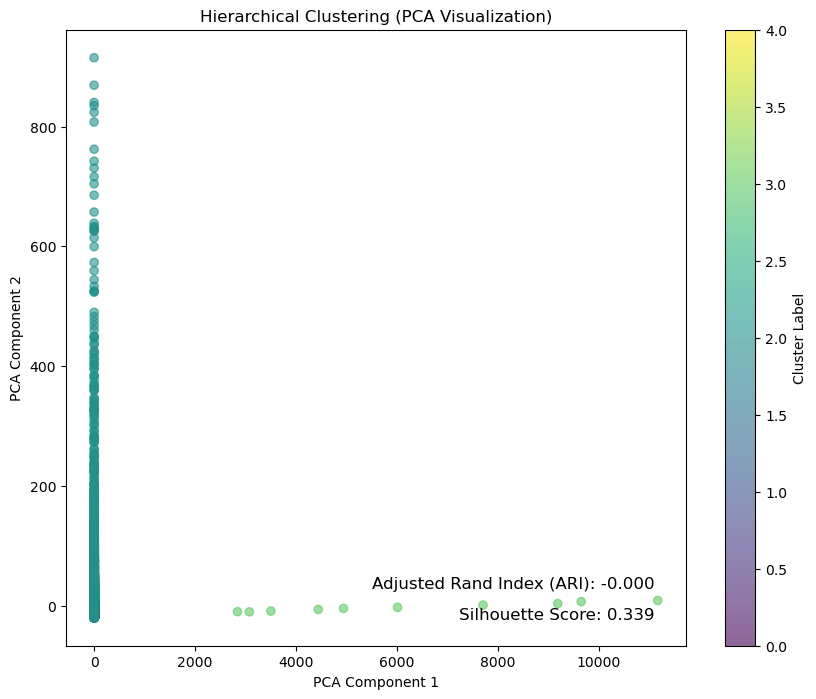

In [10]:
from sklearn.decomposition import PCA

# Assuming X_BoW is your Bag of Words (BoW) matrix
pca = PCA(n_components=2)
X_BoW_pca = pca.fit_transform(X_BoW.toarray())

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_BoW_pca[:, 0], X_BoW_pca[:, 1], c=cluster_labels_hierarchical, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering (PCA Visualization)')
plt.colorbar(scatter, label='Cluster Label')

# Add annotations for Silhouette Score and Adjusted Rand Index
plt.text(0.95, 0.05, f'Silhouette Score: {silhouette:.3f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.95, 0.10, f'Adjusted Rand Index (ARI): {ari_score:.3f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


### Validation

In [ ]:
##located in kmeans

#### 2)

In [ ]:
#adjusted rand index (ARI) external
##located in kmeans